<a href="https://colab.research.google.com/github/bibekebib/IMDB-sentiment-analysis-pytorch/blob/main/PyTorch_IMDB_dataset_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Jun 27 02:16 kaggle.json


In [3]:
# Next, install the Kaggle API client.
!pip install -q kaggle
!pip install wordcloud

In [4]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# List available datasets.
!kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              232KB  2021-06-26 07:50:27           8349  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5104  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1736  
promptcloud/careerbuilder-job-listing-2020                    Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52           1165  
coloradokb/dandelionimages                                    Da

In [6]:
# Copy the stackoverflow data set locally.
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 62% 16.0M/25.7M [00:00<00:00, 76.0MB/s]
100% 25.7M/25.7M [00:00<00:00, 100MB/s] 


In [7]:
!ls


imdb-dataset-of-50k-movie-reviews.zip  kaggle.json  sample_data


In [8]:
!unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [9]:
!ls

'IMDB Dataset.csv'			 kaggle.json
 imdb-dataset-of-50k-movie-reviews.zip	 sample_data


In [66]:
import pandas as pd
import nltk
import numpy as np
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df = pd.read_csv('IMDB Dataset.csv')

In [12]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
df.sentiment.unique()

array(['positive', 'negative'], dtype=object)

In [14]:
len(df)

50000

In [15]:
df.review[5000]

"Not a movie for everyone, but this movie is in my top 10. I am a lover of black comedy. With a cast including Richard Dreyfus (Vic), Jeff Goldblum (Mick), Larry Bishop (Nick) and Gabriel Byrne (Ben 'Brass Balls' London) in the leads, the lines can't help but be dry. The supporting cast is nearly dead center. Counting the minor flaws in the movie: Ellen Barkin's make-up gave her face has a washed out look; there were a couple of gimme cameos by Joey Bishop and Richard Pryor that served no purpose, and Michael J. Pollard's screen time was too short. Over all, the cast was just incredible without egos to wreck a fine script. If you have seen Larry Bishop's (writer, director) film, Underworld (a dark crime flick), you will enjoy this one. His next outing (writer, director, actor) is Hell Ride with Michael Madsen and Quentin Tarantino."

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [17]:
df['sentiment'] = df['sentiment'].replace({'positive':0, 'negative':1})
    

In [18]:
df['sentiment']

0        0
1        0
2        0
3        1
4        0
        ..
49995    0
49996    1
49997    1
49998    1
49999    1
Name: sentiment, Length: 50000, dtype: int64

In [19]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


In [20]:
sentence = '<html>  <br/>,  br,  <br />'

In [21]:
print(re.sub('<([A-Za-z0-9_]+)','', sentence))

>  />,  br,   />


In [22]:

def clean1(text):
  text = re.sub('<([A-Za-z0-9_]+)','', text)
  text = re.sub('[-~!@#$%^&<>?""/"\'":+=,"\."\)""\("]', '', text)
  text = re.sub('\s+', ' ', text)
  # text = re.sub('<.*?"\s">','', text)
  text = re.sub('^\s', '', text)
  text = re.sub('\s$', '', text)
  text = re.sub('\d', '', text)
  return text.lower()

In [23]:
import string
def clean2(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

In [24]:
text = """Not <html/> a @bibek movie for everyone, but this movie is in my top 10. I am a lover of black comedy. With a cast including Richard Dreyfus (Vic), Jeff Goldblum (Mick), Larry Bishop (Nick) and Gabriel Byrne (Ben 'Brass Balls' London) in the leads, the lines can't help but be dry. The supporting cast is nearly dead center. Counting the minor flaws in the movie: Ellen Barkin's make-up gave her face has a washed out look; there were a couple of gimme cameos by Joey Bishop and Richard Pryor that served no purpose, and Michael J. Pollard's screen time was too short. Over all, the cast was just incredible without egos to wreck a fine script. If you have seen Larry Bishop's (writer, director) film, Underworld <br/> (a dark crime flick), you will enjoy this one. His next outing (writer, director, actor) is Hell Ride with Michael Madsen and Quentin Tarantino.
"""

In [25]:
ok = clean1(text)
ok = clean2(ok)

In [26]:
df['clean'] = df['review'].apply(clean1)
df['clean']  = df['clean'].apply(clean2)

In [27]:
df.head()

,review,sentiment,clean
0,One of the other reviewers has mentioned that ...,0,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,0,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,0,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,1,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,petter matteis love in the time of money is a ...


In [28]:
def word_token(text):
  text = [''.join(word) for word in nltk.word_tokenize(text)]
  return text

In [29]:
df['token_words'] = df['clean'].apply(word_token)
df.head()

,review,sentiment,clean,token_words
0,One of the other reviewers has mentioned that ...,0,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,0,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin..."
2,I thought this was a wonderful way to spend ti...,0,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,1,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


In [30]:
def stopwords_removel(text):
    text = [word for word in text if word not in STOP_WORDS]
    return text

df['clean_words'] =df['token_words'].apply(stopwords_removel)
df.head()

,review,sentiment,clean,token_words,clean_words
0,One of the other reviewers has mentioned that ...,0,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[reviewers, mentioned, watching, oz, episode, ..."
1,A wonderful little production. <br /><br />The...,0,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,0,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,1,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl...","[basically, theres, family, little, boy, jake,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,..."


In [31]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [32]:
def word_stem(text):
    text = [stemmer.stem(word) for word in text]
    return text

df['stem_words'] =df['clean_words'].apply(word_stem)
df.head()

,review,sentiment,clean,token_words,clean_words,stem_words
0,One of the other reviewers has mentioned that ...,0,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[reviewers, mentioned, watching, oz, episode, ...","[review, mention, watch, oz, episod, youll, ho..."
1,A wonderful little production. <br /><br />The...,0,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,0,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,1,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl...","[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st..."


In [33]:
from nltk.stem import WordNetLemmatizer
lemantizer = WordNetLemmatizer()
def word_lemantize(text):
    text = ' '.join([lemantizer.lemmatize(word) for word in text])
    return text

df['lemantized_words'] =df['clean_words'].apply(word_lemantize)
df.head()

,review,sentiment,clean,token_words,clean_words,stem_words,lemantized_words
0,One of the other reviewers has mentioned that ...,0,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[reviewers, mentioned, watching, oz, episode, ...","[review, mention, watch, oz, episod, youll, ho...",reviewer mentioned watching oz episode youll h...
1,A wonderful little production. <br /><br />The...,0,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...",wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,0,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...",thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,1,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl...","[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think...",basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...",petter matteis love time money visually stunni...


In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [35]:
text_all = ''
for lines in df['lemantized_words']:
  text_all +=lines
print(text_all)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



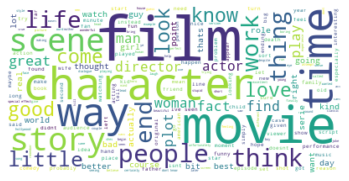

In [36]:
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text_all)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
df_clean = df[['lemantized_words', 'sentiment']].copy()

In [38]:
df_clean.head()

,lemantized_words,sentiment
0,reviewer mentioned watching oz episode youll h...,0
1,wonderful little production filming technique ...,0
2,thought wonderful way spend time hot summer we...,0
3,basically there family little boy jake think t...,1
4,petter matteis love time money visually stunni...,0


In [39]:
df_clean.columns = ['data', 'label']

In [40]:
df_clean.to_csv('data.csv', index=False)

In [41]:
!ls

 data.csv	     imdb-dataset-of-50k-movie-reviews.zip   sample_data
'IMDB Dataset.csv'   kaggle.json


In [56]:
import torch
import torchtext
import torchtext.legacy.data as ttd
from datetime import datetime
import torch.nn as nn
from datetime import datetime

In [43]:
TEXT = ttd.Field(
   sequential=True,
   use_vocab=True, 
   lower = True,
   tokenize='spacy',
   batch_first=True,
   pad_first=True,
)
LABEL = ttd.Field(
    sequential=False,
    use_vocab=False,
    is_target=True
)

In [44]:
dataset = ttd.TabularDataset(
    path='data.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT), ('label', LABEL)]
)

In [45]:
train_dataset, test_dataset = dataset.split(0.7)

In [46]:
TEXT.build_vocab(train_dataset,)

In [47]:
vocab = TEXT.vocab
vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f7e9fcd3e50>>,
            {'<unk>': 0,
             '<pad>': 1,
             'movie': 2,
             'film': 3,
             'nt': 4,
             'like': 5,
             'time': 6,
             'good': 7,
             'character': 8,
             'story': 9,
             'scene': 10,
             's': 11,
             'i': 12,
             'people': 13,
             'great': 14,
             'bad': 15,
             'do': 16,
             'way': 17,
             'thing': 18,
             'think': 19,
             'life': 20,
             'watch': 21,
             'know': 22,
             'love': 23,
             'actor': 24,
             'seen': 25,
             'plot': 26,
             'end': 27,
             'look': 28,
             'acting': 29,
             'year': 30,
             'little': 31,
             'best': 32,
             'better': 33,
             'man': 34,
             '

In [48]:
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [50]:
train_iter, test_iter = ttd.Iterator.splits(
    (train_dataset, test_dataset), sort_key= lambda x: len(x.data),
    batch_sizes = (32,256), device=device)

In [54]:
for inputs, targets in train_iter:
  print('inputs: ',inputs, 'inputs.size: ',inputs.shape)
  print('targets: ',targets, 'targets.size: ',targets.shape)
  break

inputs:  tensor([[    1,     1,     1,  ...,   988,  2984, 10755],
        [    1,     1,     1,  ...,   229,     3,   263],
        [    1,     1,     1,  ...,   726, 32597, 70796],
        ...,
        [    1,     1,     1,  ..., 12581,    28,    66],
        [    1,     1,     1,  ...,   711, 13650,  5433],
        [    1,     1,     1,  ...,  5832,  4405, 69588]]) inputs.size:  torch.Size([32, 197])
targets:  tensor([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0]) targets.size:  torch.Size([32])


In [55]:
for inputs, targets in test_iter:
  print('inputs: ',inputs, 'inputs.size: ',inputs.shape)
  print('targets: ',targets, 'targets.size: ',targets.shape)
  break

inputs:  tensor([[ 409,  397, 3008,  ..., 1485,  210,  221],
        [ 185,    3,  719,  ...,  382, 1291,  111],
        [  12,   37,  115,  ...,  584,  295,   33],
        ...,
        [   1,    1,    1,  ..., 1152, 1888,  154],
        [   1,    1,    1,  ...,  222,    7,  103],
        [   1,    1,    1,  ..., 2223, 1095,  971]]) inputs.size:  torch.Size([256, 21])
targets:  tensor([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 

# Defining a model

In [85]:
# Define the model
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
    super(RNN, self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers

    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True)
    self.fc = nn.Linear(self.M, self.K)
  
  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    # embedding layer
    # turns word indexes into word vectors
    out = self.embed(X)

    # get RNN unit output
    out, _ = self.rnn(out, (h0, c0))

    # max pool
    out, _ = torch.max(out, 1)

    # we only want h(T) at the final time step
    out = self.fc(out)
    return out

In [86]:
model = RNN(len(vocab), 15, 20, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(123239, 15)
  (rnn): LSTM(15, 20, batch_first=True)
  (fc): Linear(in_features=20, out_features=1, bias=True)
)

In [87]:
criterion  = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [88]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_iter, test_iter, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_iter:
      # print("inputs.shape:", inputs.shape, "targets.shape:", targets.shape)
      targets = targets.view(-1, 1).float()
      # move data to GPU
      # inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading
    
    test_loss = []
    for inputs, targets in test_iter:
      # inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1, 1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [89]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_iter, test_iter, 15)

Epoch 1/15, Train Loss: 0.5991,       Test Loss: 0.4929, Duration: 0:02:40.265119
Epoch 2/15, Train Loss: 0.4036,       Test Loss: 0.4008, Duration: 0:02:26.624965
Epoch 3/15, Train Loss: 0.3120,       Test Loss: 0.3744, Duration: 0:02:21.246537
Epoch 4/15, Train Loss: 0.2531,       Test Loss: 0.3659, Duration: 0:02:19.785468
Epoch 5/15, Train Loss: 0.2078,       Test Loss: 0.3677, Duration: 0:02:19.904446
Epoch 6/15, Train Loss: 0.1720,       Test Loss: 0.4023, Duration: 0:02:18.982205
Epoch 7/15, Train Loss: 0.1394,       Test Loss: 0.4035, Duration: 0:02:19.115635
Epoch 8/15, Train Loss: 0.1142,       Test Loss: 0.4367, Duration: 0:02:20.036445
Epoch 9/15, Train Loss: 0.0930,       Test Loss: 0.4302, Duration: 0:02:18.873470
Epoch 10/15, Train Loss: 0.0757,       Test Loss: 0.4755, Duration: 0:02:20.072241
Epoch 11/15, Train Loss: 0.0604,       Test Loss: 0.5056, Duration: 0:02:20.887270
Epoch 12/15, Train Loss: 0.0476,       Test Loss: 0.5494, Duration: 0:02:21.696734
Epoch 13/15, 

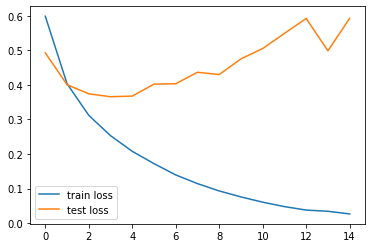

In [90]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [91]:
# Accuracy

n_correct = 0.
n_total = 0.
for inputs, targets in train_iter:
  targets = targets.view(-1, 1).float()

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_iter:
  targets = targets.view(-1, 1).float()

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9965, Test acc: 0.8484
